<a href="https://www.kaggle.com/code/pirajeshmr/ml-main-pred?scriptVersionId=214534273" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
import seaborn as sns
from tkinter import *
from tkinter import messagebox
import sys 
import urllib
import urllib.request

In [2]:
df = pd.read_csv('/kaggle/input/sympdp/dataset.csv')
severity = pd.read_csv('/kaggle/input/sympdp/Symptom-severity.csv')
description = pd.read_csv('/kaggle/input/sympdp/symptom_Description.csv')
precaution = pd.read_csv('/kaggle/input/sympdp/symptom_precaution.csv')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.countplot(y=df['Disease'], order=df['Disease'].value_counts().index, palette="viridis")
plt.title("Distribution of Diseases")
plt.xlabel("Count")
plt.ylabel("Disease")
plt.show()


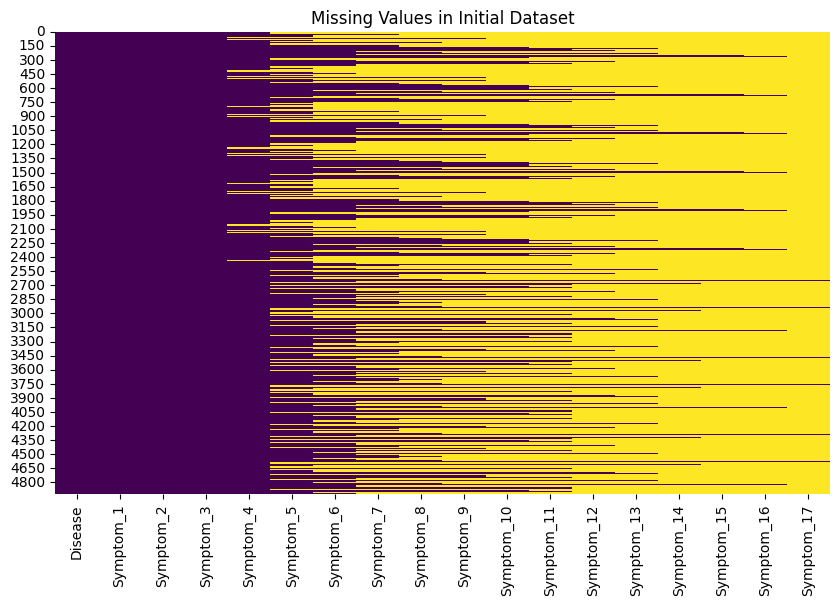

In [4]:
# Plot a heatmap of missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values in Initial Dataset")
plt.show()


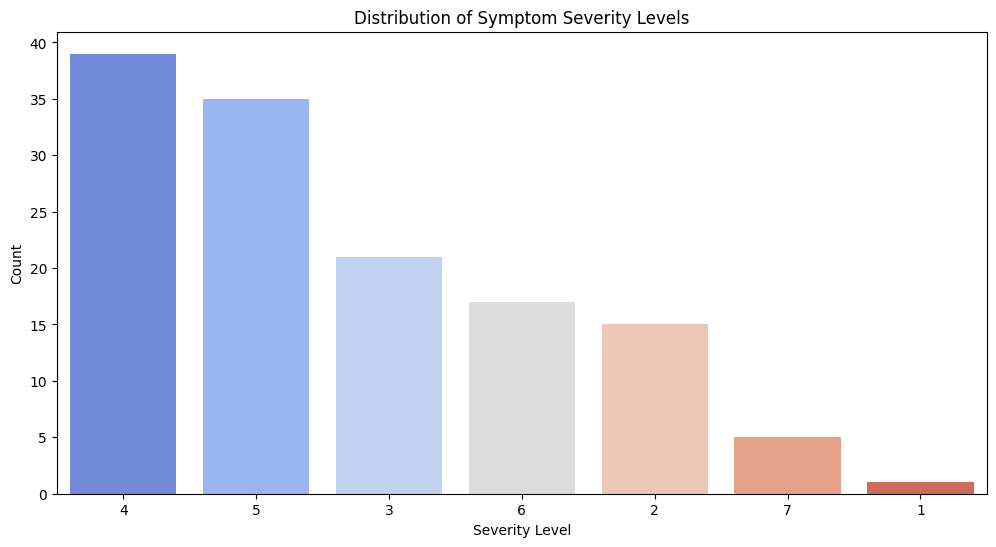

In [5]:
# Visualize severity levels of symptoms
plt.figure(figsize=(12, 6))
sns.countplot(x='weight', data=severity, palette="coolwarm", order=severity['weight'].value_counts().index)
plt.title("Distribution of Symptom Severity Levels")
plt.xlabel("Severity Level")
plt.ylabel("Count")
plt.show()


In [ ]:
# Create a binary presence matrix for symptoms
symptom_matrix = df.drop(columns=["Disease"]).notna().astype(int)
symptom_matrix["Disease"] = df["Disease"]

# Group by disease and sum symptom occurrences
grouped_symptom_matrix = symptom_matrix.groupby("Disease").sum()

# Heatmap of symptom-disease relationships
plt.figure(figsize=(15, 10))
sns.heatmap(grouped_symptom_matrix, cmap="Blues", cbar=True, linewidths=0.5)
plt.title("Symptom Presence by Disease")
plt.xlabel("Symptoms")
plt.ylabel("Diseases")
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


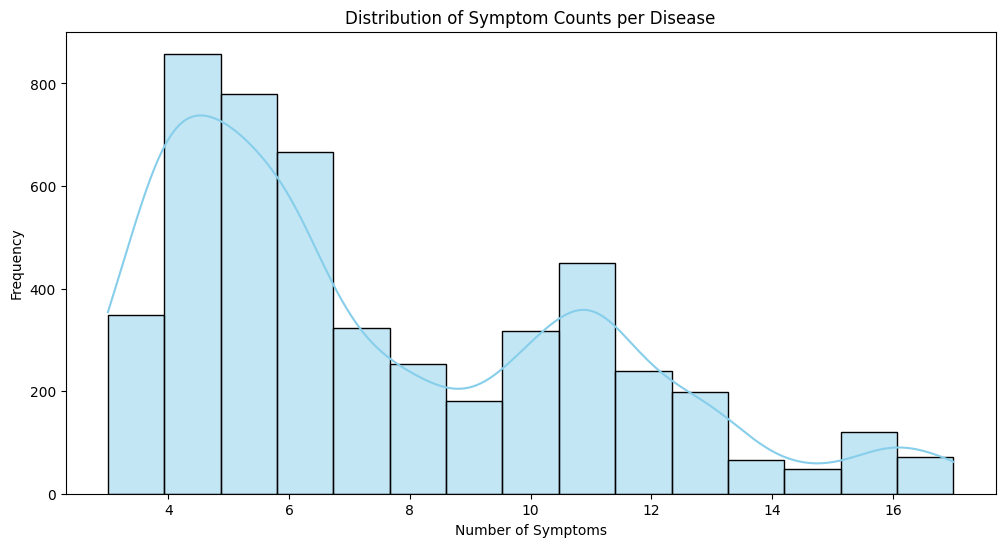

In [7]:
df["Symptom_Count"] = df.filter(like="Symptom").notna().sum(axis=1)
plt.figure(figsize=(12, 6))
sns.histplot(df["Symptom_Count"], bins=15, kde=True, color="skyblue")
plt.title("Distribution of Symptom Counts per Disease")
plt.xlabel("Number of Symptoms")
plt.ylabel("Frequency")
plt.show()


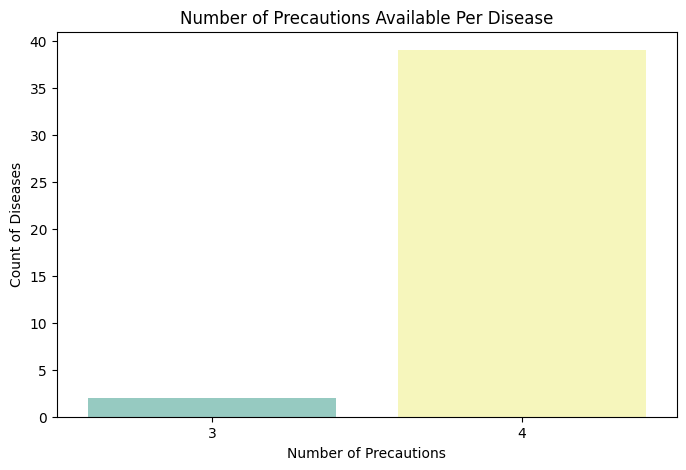

In [8]:
# Count non-null precautions for each disease
precaution["Precaution_Count"] = precaution.filter(like="Precaution").notna().sum(axis=1)

# Plot precaution count distribution
plt.figure(figsize=(8, 5))
sns.countplot(x="Precaution_Count", data=precaution, palette="Set3")
plt.title("Number of Precautions Available Per Disease")
plt.xlabel("Number of Precautions")
plt.ylabel("Count of Diseases")
plt.show()


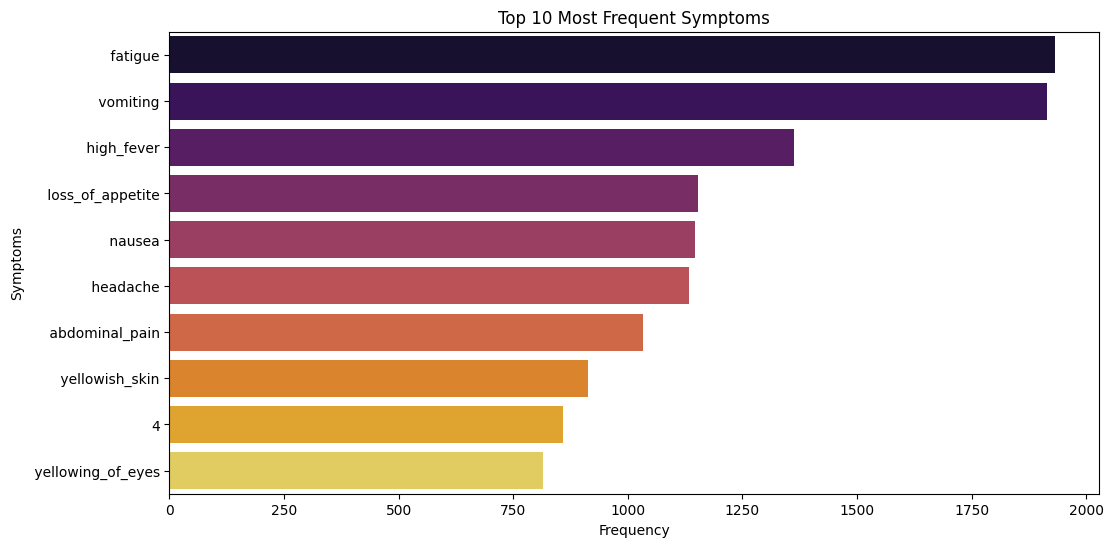

In [9]:
# Flatten symptoms into a single series
symptom_list = df.filter(like="Symptom").melt(var_name="Symptom_Column", value_name="Symptom").dropna()
most_frequent_symptoms = symptom_list["Symptom"].value_counts().head(10)

# Plot the most frequent symptoms
plt.figure(figsize=(12, 6))
sns.barplot(x=most_frequent_symptoms.values, y=most_frequent_symptoms.index, palette="inferno")
plt.title("Top 10 Most Frequent Symptoms")
plt.xlabel("Frequency")
plt.ylabel("Symptoms")
plt.show()


In [10]:
combined_df = pd.merge(df,description,on='Disease')
combined_df.shape

(4560, 20)

In [11]:
combined_df = pd.merge(combined_df,precaution,on='Disease')

In [12]:
combined_df.sample(5)

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,...,Symptom_15,Symptom_16,Symptom_17,Symptom_Count,Description,Precaution_1,Precaution_2,Precaution_3,Precaution_4,Precaution_Count
4432,Psoriasis,skin_rash,joint_pain,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,NaN,NaN,NaN,...,NaN,NaN,NaN,6,Psoriasis is a common skin disorder that forms...,wash hands with warm soapy water,stop bleeding using pressure,consult doctor,salt baths,4
3140,Heart attack,vomiting,breathlessness,sweating,chest_pain,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4,The death of heart muscle due to the loss of b...,call ambulance,chew or swallow asprin,keep calm,NaN,3
2971,Common Cold,continuous_sneezing,chills,fatigue,cough,high_fever,headache,swelled_lymph_nodes,malaise,phlegm,...,chest_pain,loss_of_smell,muscle_pain,17,The common cold is a viral infection of your n...,drink vitamin c rich drinks,take vapour,avoid cold food,keep fever in check,4
3353,Varicose veins,fatigue,cramps,bruising,obesity,swollen_legs,swollen_blood_vessels,prominent_veins_on_calf,NaN,NaN,...,NaN,NaN,NaN,7,"A vein that has enlarged and twisted, often ap...",lie down flat and raise the leg high,use oinments,use vein compression,dont stand still for long,4
1037,Bronchial Asthma,fatigue,cough,high_fever,breathlessness,family_history,mucoid_sputum,NaN,NaN,NaN,...,NaN,NaN,NaN,6,Bronchial asthma is a medical condition which ...,switch to loose cloothing,take deep breaths,get away from trigger,seek help,4


In [13]:
combined_df.isna().sum()

Disease                0
Symptom_1              0
Symptom_2              0
Symptom_3              0
Symptom_4            348
Symptom_5           1128
Symptom_6           1746
Symptom_7           2412
Symptom_8           2736
Symptom_9           2988
Symptom_10          3120
Symptom_11          3366
Symptom_12          3816
Symptom_13          4056
Symptom_14          4254
Symptom_15          4320
Symptom_16          4368
Symptom_17          4488
Symptom_Count          0
Description            0
Precaution_1           0
Precaution_2           0
Precaution_3         120
Precaution_4         120
Precaution_Count       0
dtype: int64

In [14]:
#deleting the columns which we dont need
del combined_df['Symptom_4']   
del combined_df['Symptom_5']   
del combined_df['Symptom_6']   
del combined_df['Symptom_7']   
del combined_df['Symptom_8']   
del combined_df['Symptom_9']   
del combined_df['Symptom_10']   
del combined_df['Symptom_11']   
del combined_df['Symptom_12']   
del combined_df['Symptom_13']   
del combined_df['Symptom_14']   
del combined_df['Symptom_15']   
del combined_df['Symptom_16']
del combined_df['Symptom_17']    

In [15]:
combined_df = combined_df.fillna(method='ffill') 

<ipython-input-15-310c9c9fb7da>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined_df = combined_df.fillna(method='ffill')


In [16]:
combined_df.columns

Index(['Disease', 'Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_Count',
       'Description', 'Precaution_1', 'Precaution_2', 'Precaution_3',
       'Precaution_4', 'Precaution_Count'],
      dtype='object')

In [17]:
#removing any whitespaces
cols = combined_df.columns
data = combined_df[cols].values.flatten()

s = pd.Series(data)
s = s.str.strip()
s = s.values.reshape(combined_df.shape)

combined_df = pd.DataFrame(s, columns=combined_df.columns)
combined_df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_Count,Description,Precaution_1,Precaution_2,Precaution_3,Precaution_4,Precaution_Count
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,"In humans, fungal infections occur when an inv...",bath twice,use detol or neem in bathing water,keep infected area dry,use clean cloths,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,"In humans, fungal infections occur when an inv...",bath twice,use detol or neem in bathing water,keep infected area dry,use clean cloths,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,"In humans, fungal infections occur when an inv...",bath twice,use detol or neem in bathing water,keep infected area dry,use clean cloths,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,"In humans, fungal infections occur when an inv...",bath twice,use detol or neem in bathing water,keep infected area dry,use clean cloths,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,"In humans, fungal infections occur when an inv...",bath twice,use detol or neem in bathing water,keep infected area dry,use clean cloths,NaN


In [18]:
X = combined_df[['Symptom_1','Symptom_2','Symptom_3']]
X.head()

,Symptom_1,Symptom_2,Symptom_3
0,itching,skin_rash,nodal_skin_eruptions
1,skin_rash,nodal_skin_eruptions,dischromic _patches
2,itching,nodal_skin_eruptions,dischromic _patches
3,itching,skin_rash,dischromic _patches
4,itching,skin_rash,nodal_skin_eruptions


In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [20]:
for lul in X.columns:
    X[lul] = le.fit_transform(X[lul].astype(str))

<ipython-input-20-5d2d09ff81dc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[lul] = le.fit_transform(X[lul].astype(str))
<ipython-input-20-5d2d09ff81dc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[lul] = le.fit_transform(X[lul].astype(str))
<ipython-input-20-5d2d09ff81dc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

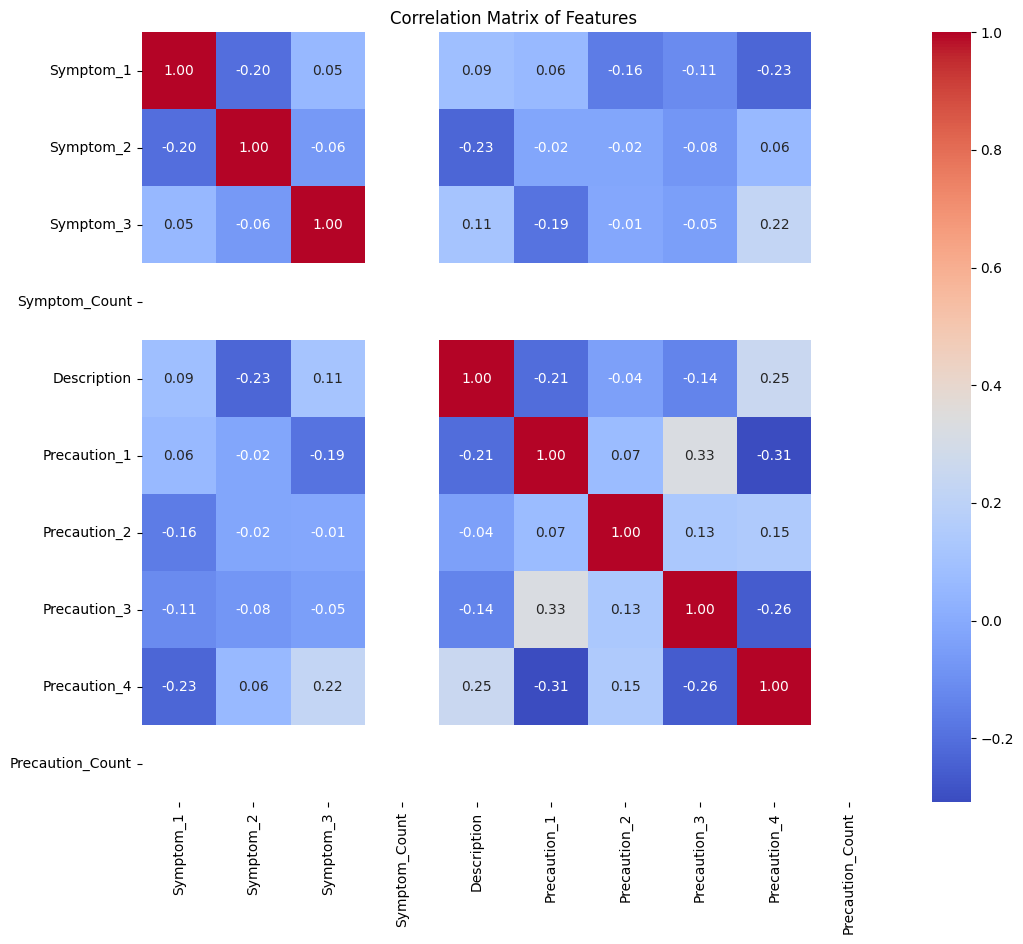

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_df = combined_df.drop(columns=['Disease'])

for column in correlation_df.columns:
    correlation_df[column] = le.fit_transform(correlation_df[column].astype(str))

correlation_matrix = correlation_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix of Features")
plt.show()



In [22]:
X.head()

,Symptom_1,Symptom_2,Symptom_3
0,13,30,33
1,22,25,17
2,13,25,17
3,13,30,17
4,13,30,33


In [23]:
y = combined_df['Disease']
y.head()

0    Fungal infection
1    Fungal infection
2    Fungal infection
3    Fungal infection
4    Fungal infection
Name: Disease, dtype: object

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV


In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=999)

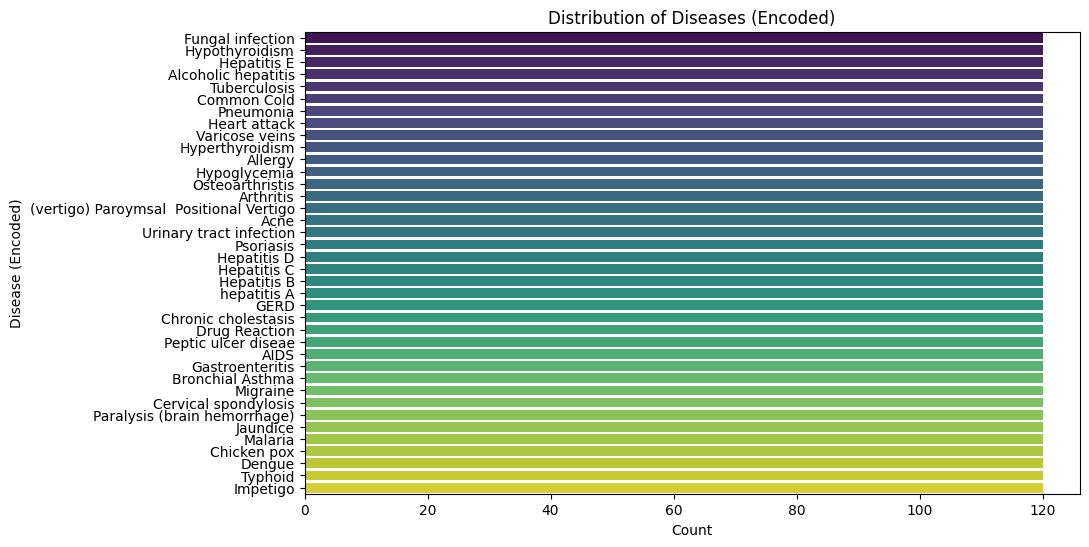

In [26]:
# Visualize distribution of diseases in the encoded target variable
plt.figure(figsize=(10, 6))
sns.countplot(y=y, palette="viridis", order=y.value_counts().index)
plt.title("Distribution of Diseases (Encoded)")
plt.xlabel("Count")
plt.ylabel("Disease (Encoded)")
plt.show()


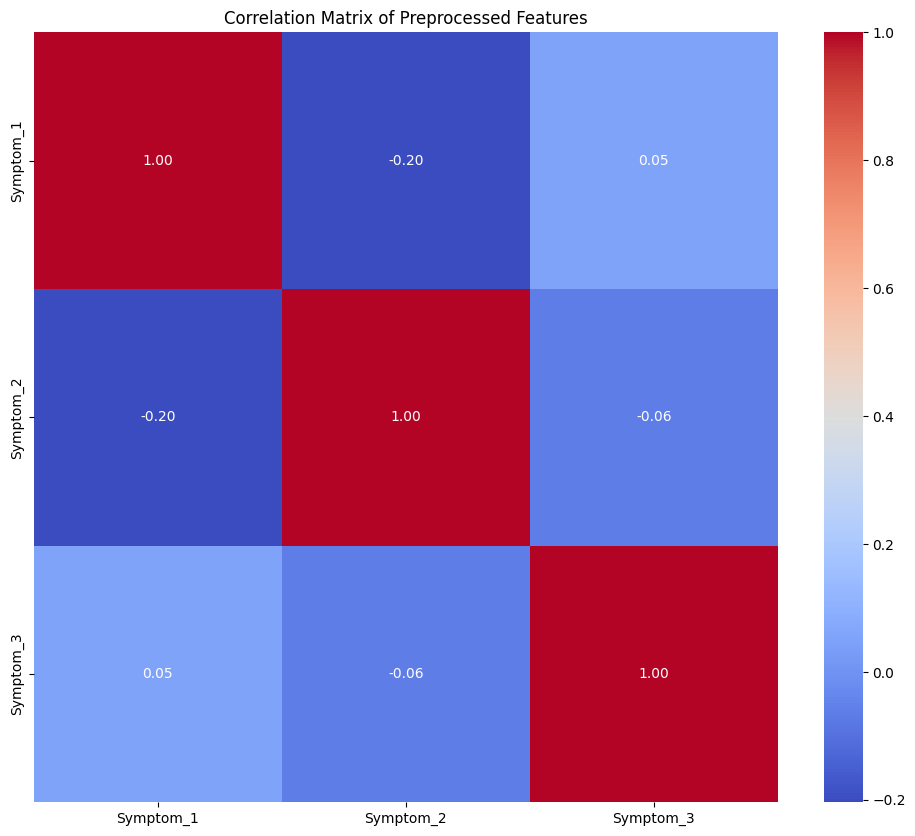

In [27]:
# Compute the correlation matrix
correlation_matrix = X.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix of Preprocessed Features")
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


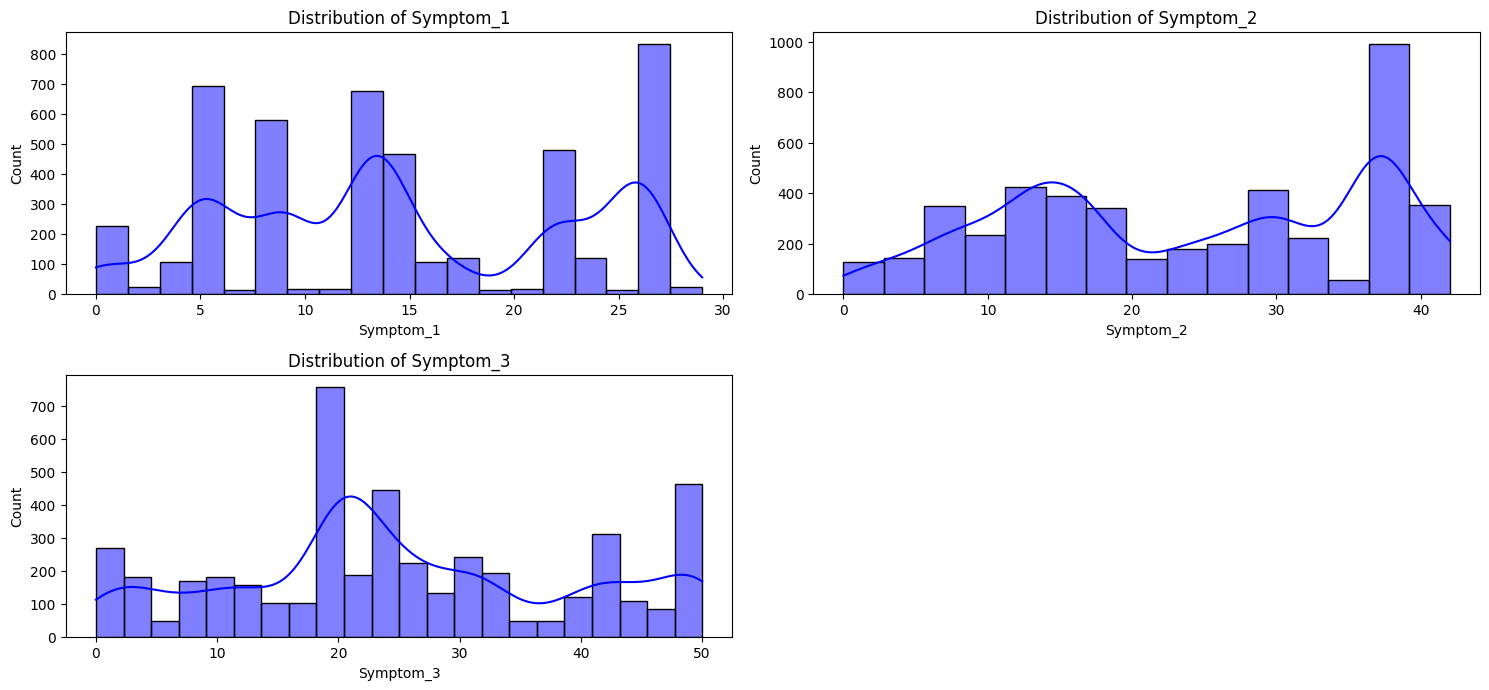

In [28]:
# Plot distribution for each feature
plt.figure(figsize=(15, 10))
for i, column in enumerate(X.columns, 1):
    plt.subplot(3, 2, i)  # Adjust grid dimensions as needed
    sns.histplot(X[column], kde=True, color="blue")
    plt.title(f"Distribution of {column}")
plt.tight_layout()
plt.show()


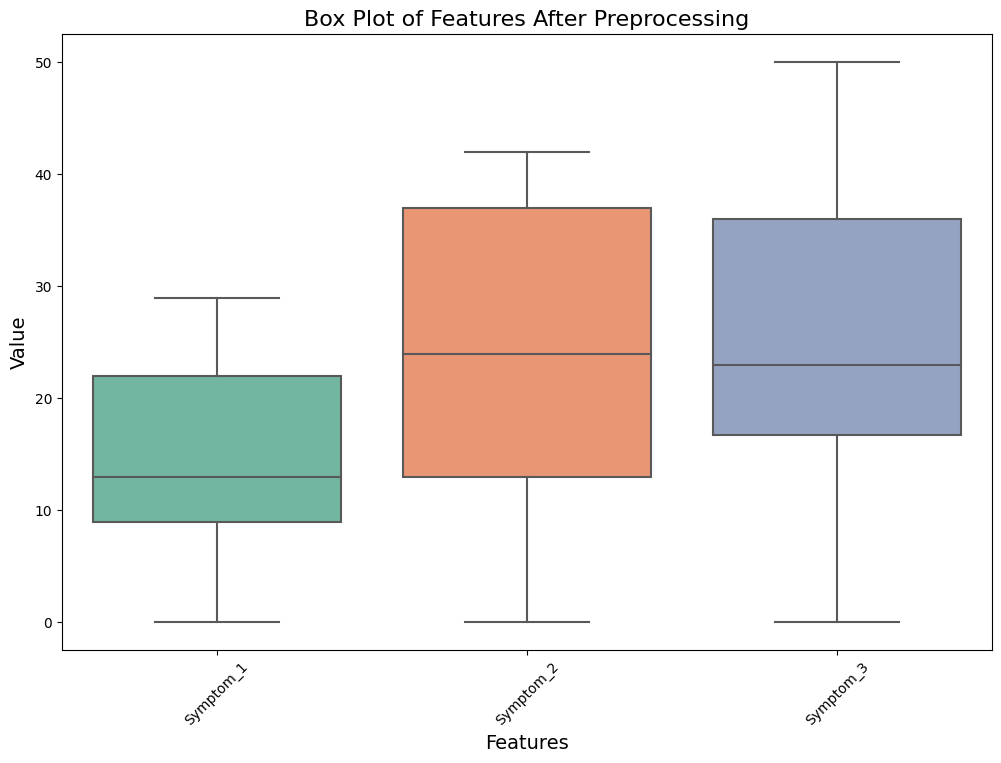

In [29]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=X, palette="Set2")
plt.title("Box Plot of Features After Preprocessing", fontsize=16)
plt.xlabel("Features", fontsize=14)
plt.ylabel("Value", fontsize=14)
plt.xticks(rotation=45)
plt.show()

In [30]:
from sklearn.svm import SVC

In [31]:
model = SVC()
model.fit(X_train, y_train)

preds = model.predict(X_test)
print(preds)

['Urinary tract infection' 'Dengue' 'AIDS' 'Peptic ulcer diseae'
 'Pneumonia' 'Hepatitis C' 'Gastroenteritis' 'Chicken pox'
 'Cervical spondylosis' 'Hepatitis E' 'Chicken pox' 'Drug Reaction'
 'Urinary tract infection' 'Psoriasis' 'Hepatitis B' 'AIDS'
 'Peptic ulcer diseae' 'Urinary tract infection' 'Peptic ulcer diseae'
 'Hypoglycemia' 'Impetigo' 'Typhoid' 'Typhoid' 'Hypoglycemia'
 'Chicken pox' 'Hepatitis E' 'Paralysis (brain hemorrhage)' 'Acne'
 'Bronchial Asthma' 'Typhoid' 'Gastroenteritis' 'hepatitis A' 'Migraine'
 'Dengue' 'Urinary tract infection' 'hepatitis A' 'hepatitis A'
 'Psoriasis' 'Varicose veins' 'Hypothyroidism' 'Impetigo' 'Pneumonia'
 'Alcoholic hepatitis' 'Paralysis (brain hemorrhage)' 'Chicken pox'
 'Alcoholic hepatitis' 'GERD' 'Urinary tract infection' 'Dengue'
 'Hepatitis C' 'Fungal infection' 'Typhoid' 'Cervical spondylosis'
 'Impetigo' 'Hypoglycemia' 'Acne' 'Gastroenteritis' 'Hepatitis B'
 'Bronchial Asthma' 'Malaria' 'AIDS' 'Hepatitis E' 'Drug Reaction'
 'Paraly

In [32]:
C = [0.1, 1, 10, 100, 1000]  # Regularization parameter
kernel = ['linear', 'poly', 'rbf', 'sigmoid']  # Kernel types
degree = [2, 3, 4, 5]  # Degree for polynomial kernel
gamma = ['scale', 'auto']  # Kernel coefficient
coef0 = [0.0, 0.1, 0.5, 1.0]  # Independent term in polynomial/sigmoid kernel
shrinking = [True, False]  # Whether to use the shrinking heuristic
probability = [True, False]  # Enable probability estimates

# Combine into a random grid
random_grid_svc = {
    'C': C,
    'kernel': kernel,
    'degree': degree,
    'gamma': gamma,
    'coef0': coef0,
    'shrinking': shrinking,
    'probability': probability,
}

In [33]:
svc = SVC()
random_search_svc = RandomizedSearchCV(
    estimator=svc,
    param_distributions=random_grid_svc,
    n_iter=10,  # Number of parameter settings sampled
    scoring='accuracy',  # Scoring metric
    cv=5,  # Cross-validation splits
    verbose=2,  # Higher value for detailed logging
    random_state=42,  # For reproducibility
    n_jobs=-1  # Use all processors
)

In [34]:
random_search_svc.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'coef0': [0.0, 0.1, 0.5, 1.0],
                                        'degree': [2, 3, 4, 5],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid'],
                                        'probability': [True, False],
                                        'shrinking': [True, False]},
                   random_state=42, scoring='accuracy', verbose=2)

In [35]:
random_search_svc.best_params_

{'shrinking': False,
 'probability': True,
 'kernel': 'rbf',
 'gamma': 'auto',
 'degree': 5,
 'coef0': 0.0,
 'C': 1000}

In [36]:
SVCM = SVC(
shrinking= False,
 probability= True,
 kernel= 'rbf',
 gamma= 'auto',
 degree= 5,
coef0 = 0.0,
 C = 1000)

In [37]:
SVCM.fit(X_train,y_train)

SVC(C=1000, degree=5, gamma='auto', probability=True, shrinking=False)

In [38]:
y_pred = SVCM.predict(X_test)

In [39]:
accuracy_score(y_test,y_pred)

0.930921052631579

In [40]:
from sklearn.metrics import f1_score, recall_score, precision_score

f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')

print(f"F1 Score: {f1:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f}")


F1 Score: 0.92
Recall: 0.93
Precision: 0.96


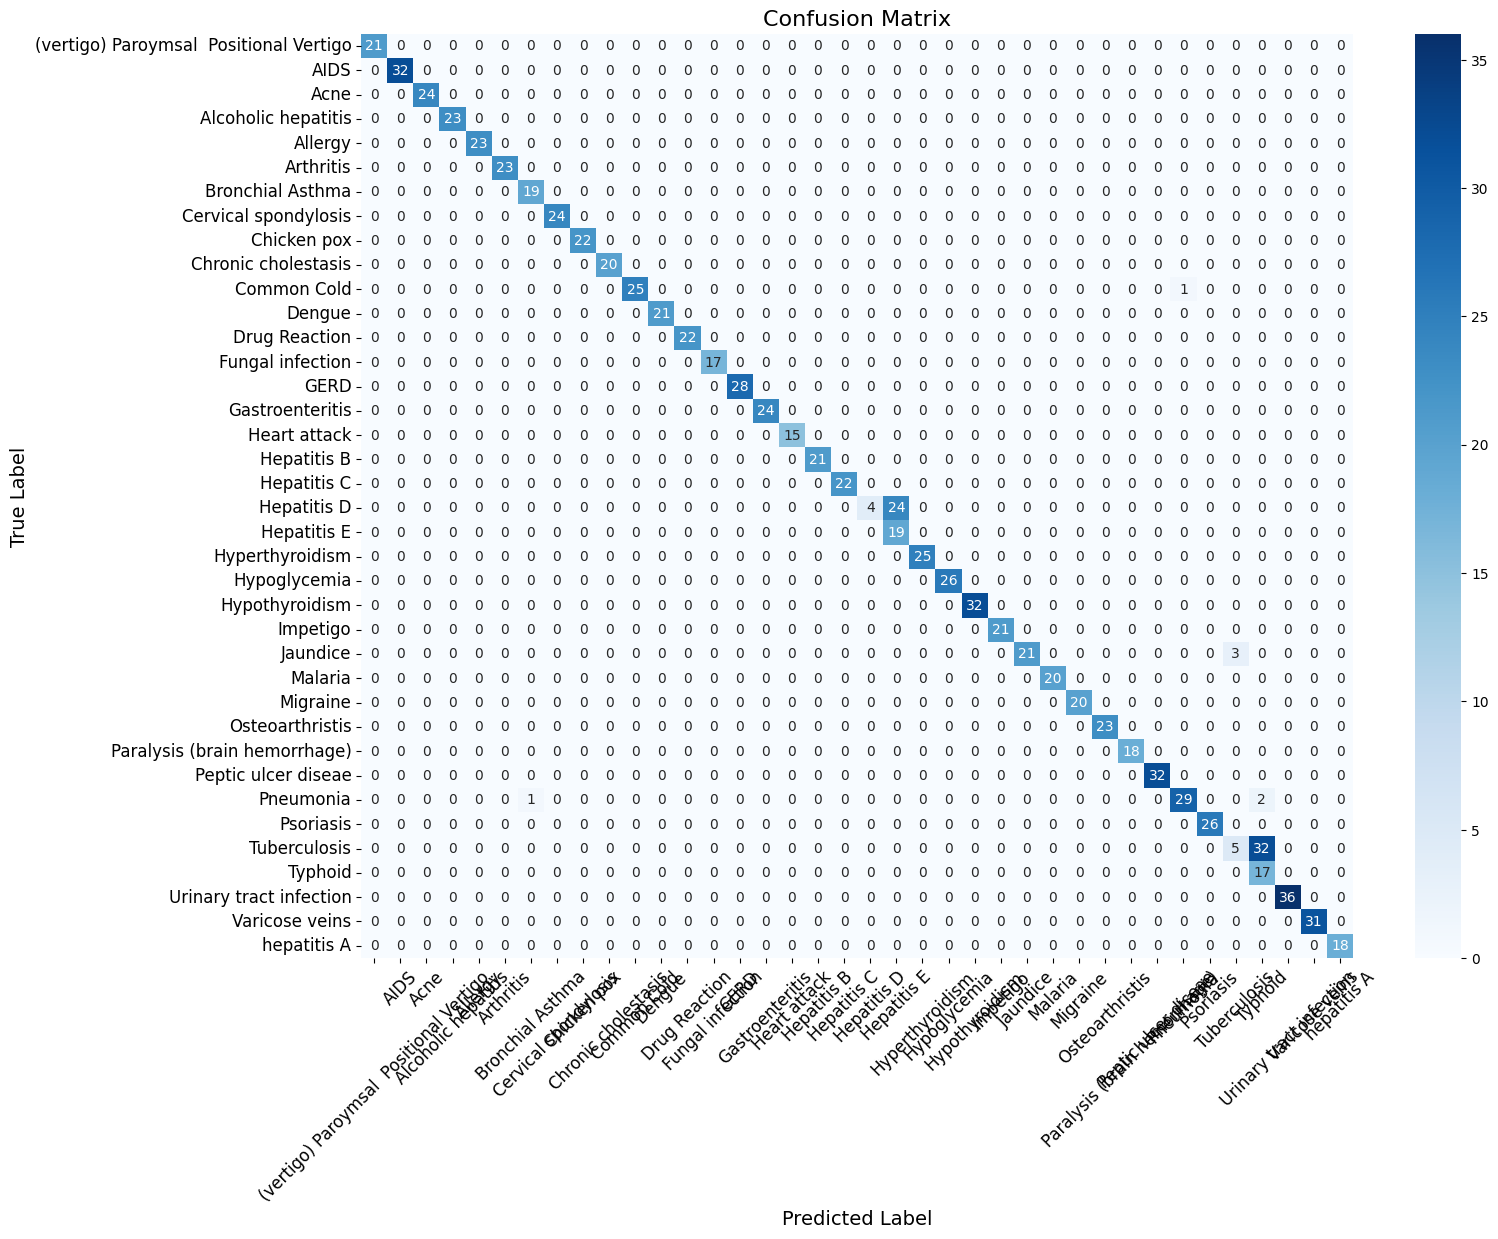

In [41]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
labels = sorted(y.unique())

plt.figure(figsize=(16, 12))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)

plt.xlabel("Predicted Label", fontsize=14)
plt.ylabel("True Label", fontsize=14)
plt.title("Confusion Matrix", fontsize=16)

plt.xticks(rotation=45, fontsize=12)
plt.yticks(rotation=0, fontsize=12)

plt.show()


In [42]:
model.fit(X_train, y_train)
Y_PRED = model.predict(X_test)

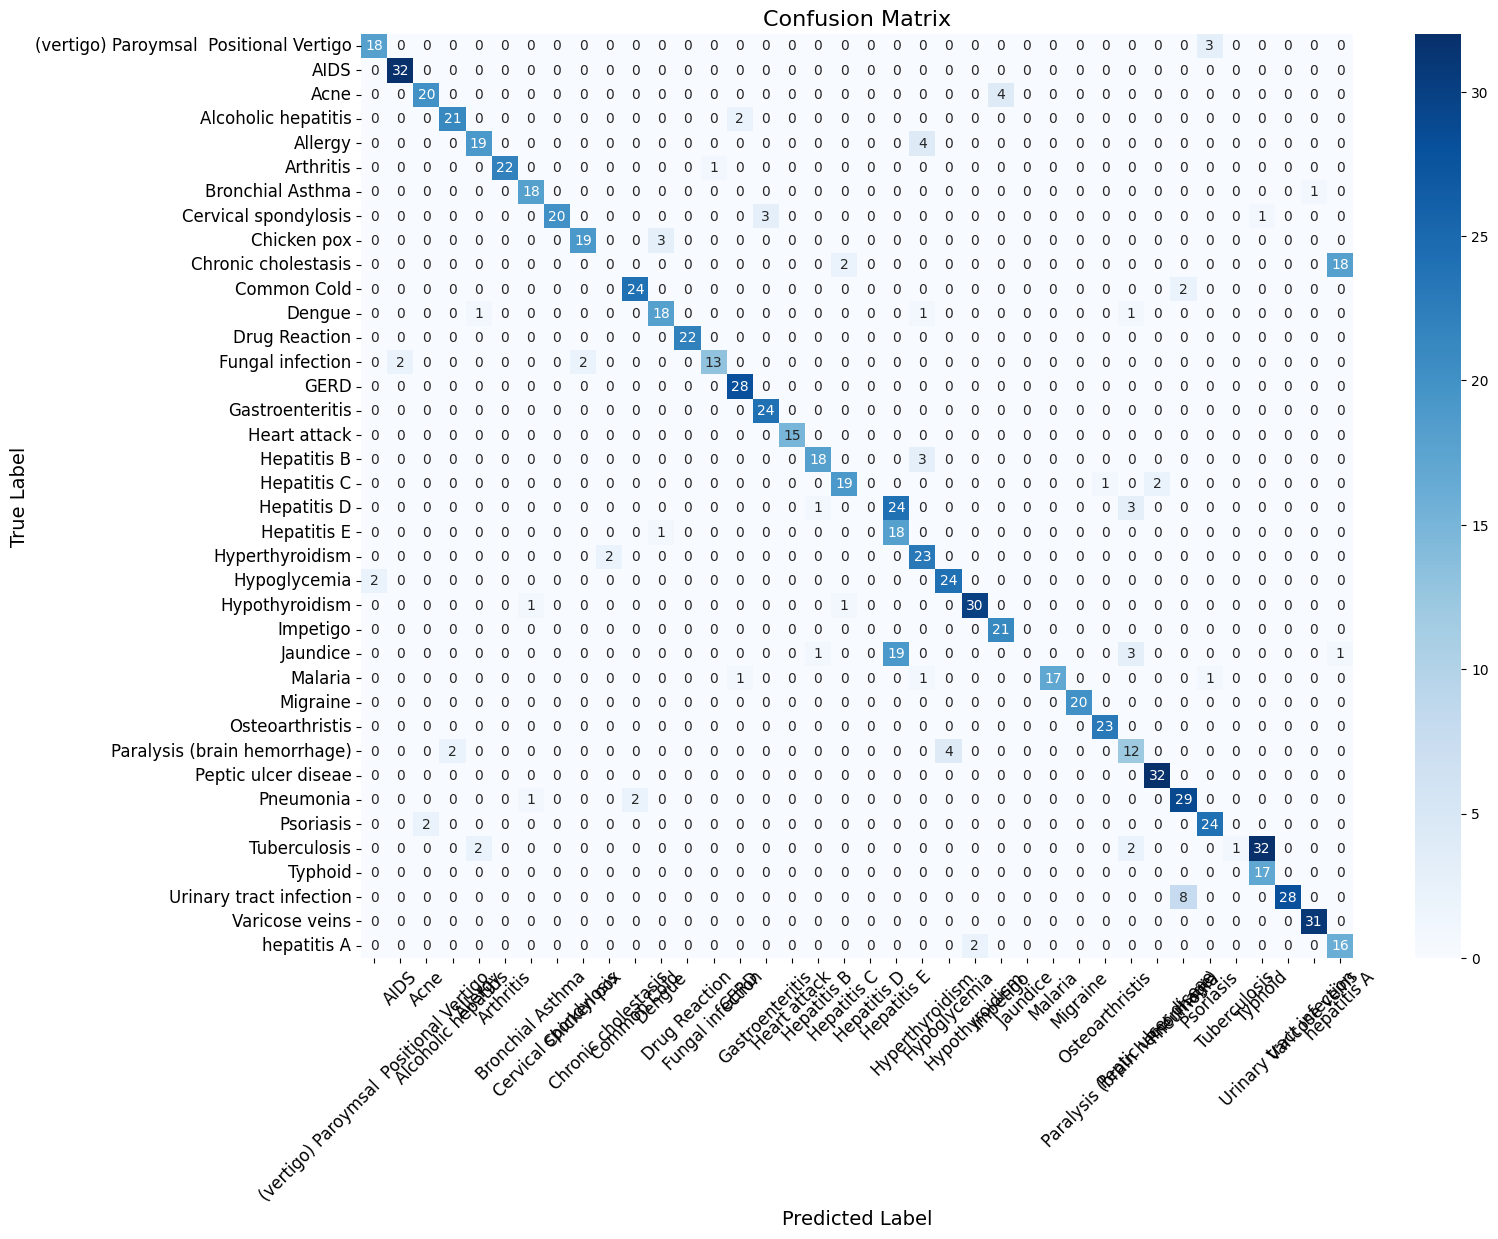

In [43]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, Y_PRED)
labels = sorted(y.unique()) 

plt.figure(figsize=(16, 12))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)

# Add labels and title
plt.xlabel("Predicted Label", fontsize=14)
plt.ylabel("True Label", fontsize=14)
plt.title("Confusion Matrix", fontsize=16)

plt.xticks(rotation=45, fontsize=12)
plt.yticks(rotation=0, fontsize=12)

plt.show()


In [44]:
accuracy_score(y_test,Y_PRED)

0.8070175438596491

In [45]:
from sklearn.metrics import f1_score, recall_score, precision_score

f1 = f1_score(y_test, Y_PRED, average='weighted')
recall = recall_score(y_test, Y_PRED, average='weighted')
precision = precision_score(y_test, Y_PRED, average='weighted')

print(f"F1 Score: {f1:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f}")


F1 Score: 0.78
Recall: 0.81
Precision: 0.80


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**start of random forest**


In [46]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [47]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [48]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42)
rf_random.fit(X_train,y_train)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.6s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.6s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.5s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   1.4s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   1.4s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   1.5s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=   3.9s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=   3.8s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=   3.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   2.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   2.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   2.5s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   1.0s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   1.0s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=   5.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=   5.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=   5.1s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   3.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   3.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   3.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   5.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   5.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   5.5s


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [49]:
rf = RandomForestClassifier(bootstrap=True,
 max_depth=5,
 max_features= 'sqrt',
 min_samples_leaf= 1,
 min_samples_split= 5,
 n_estimators= 1000)

In [50]:
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.8848684210526315

gaussiannb


In [51]:
from sklearn.naive_bayes import GaussianNB

In [52]:
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)

# Make predictions
y_pred_gnb = gnb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_gnb)
print(accuracy)

0.6710526315789473


In [53]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define the parameter grid
param_dist = {
    'var_smoothing': np.logspace(-9, 0, 100)  # Logarithmic range for variance smoothing
}

# Initialize the GaussianNB model
gnb = GaussianNB()

# Randomized Search CV
random_search_gnb = RandomizedSearchCV(
    estimator=gnb,
    param_distributions=param_dist,
    n_iter=20,  # Number of parameter settings sampled
    scoring='accuracy',  # Use accuracy for evaluation
    cv=5,  # Number of cross-validation splits
    verbose=2,  # Higher value for detailed logging
    random_state=42,  # For reproducibility
    n_jobs=-1  # Use all processors
)

random_search_gnb.fit(X_train, y_train)

print("Best Parameters:", random_search_gnb.best_params_)

best_gnb = random_search_gnb.best_estimator_
y_pred_best_gnb = best_gnb.predict(X_test)

# Test set accuracy
test_accuracy = accuracy_score(y_test, y_pred_best_gnb)
print(f"Test Accuracy with Best Model: {test_accuracy:.2f}")


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'var_smoothing': 0.0023101297000831626}
Test Accuracy with Best Model: 0.71


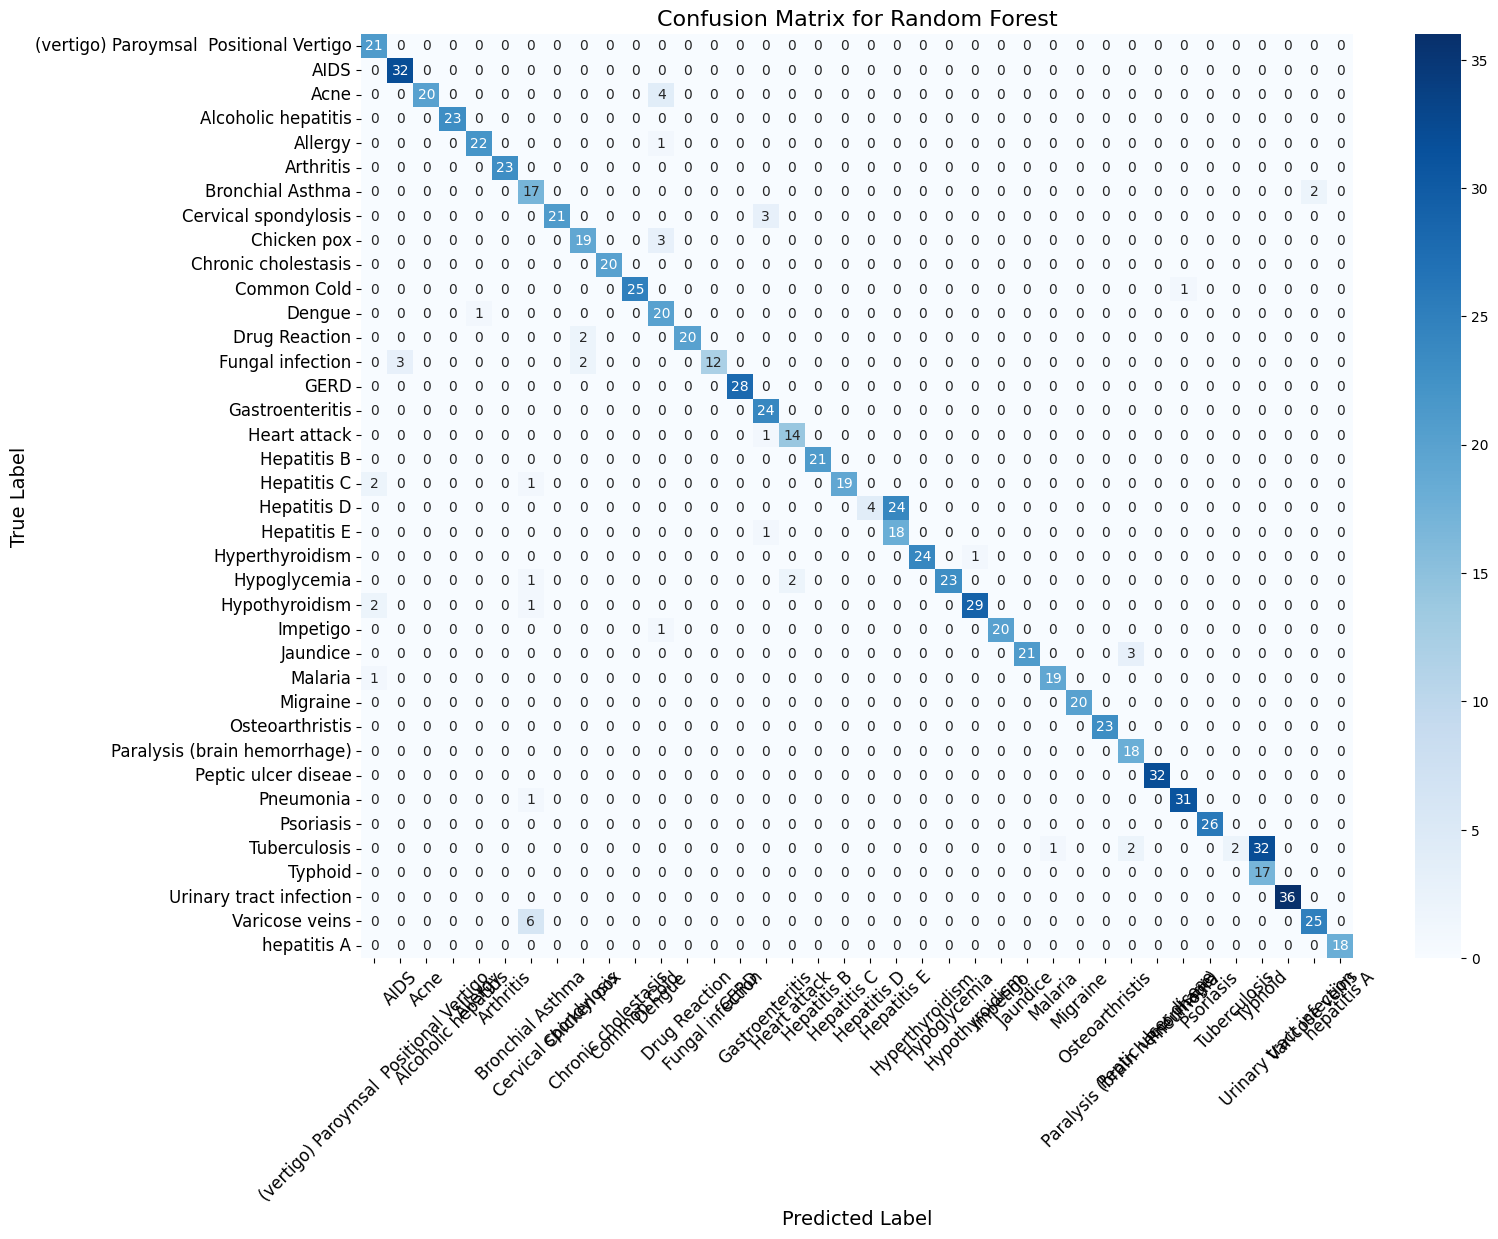

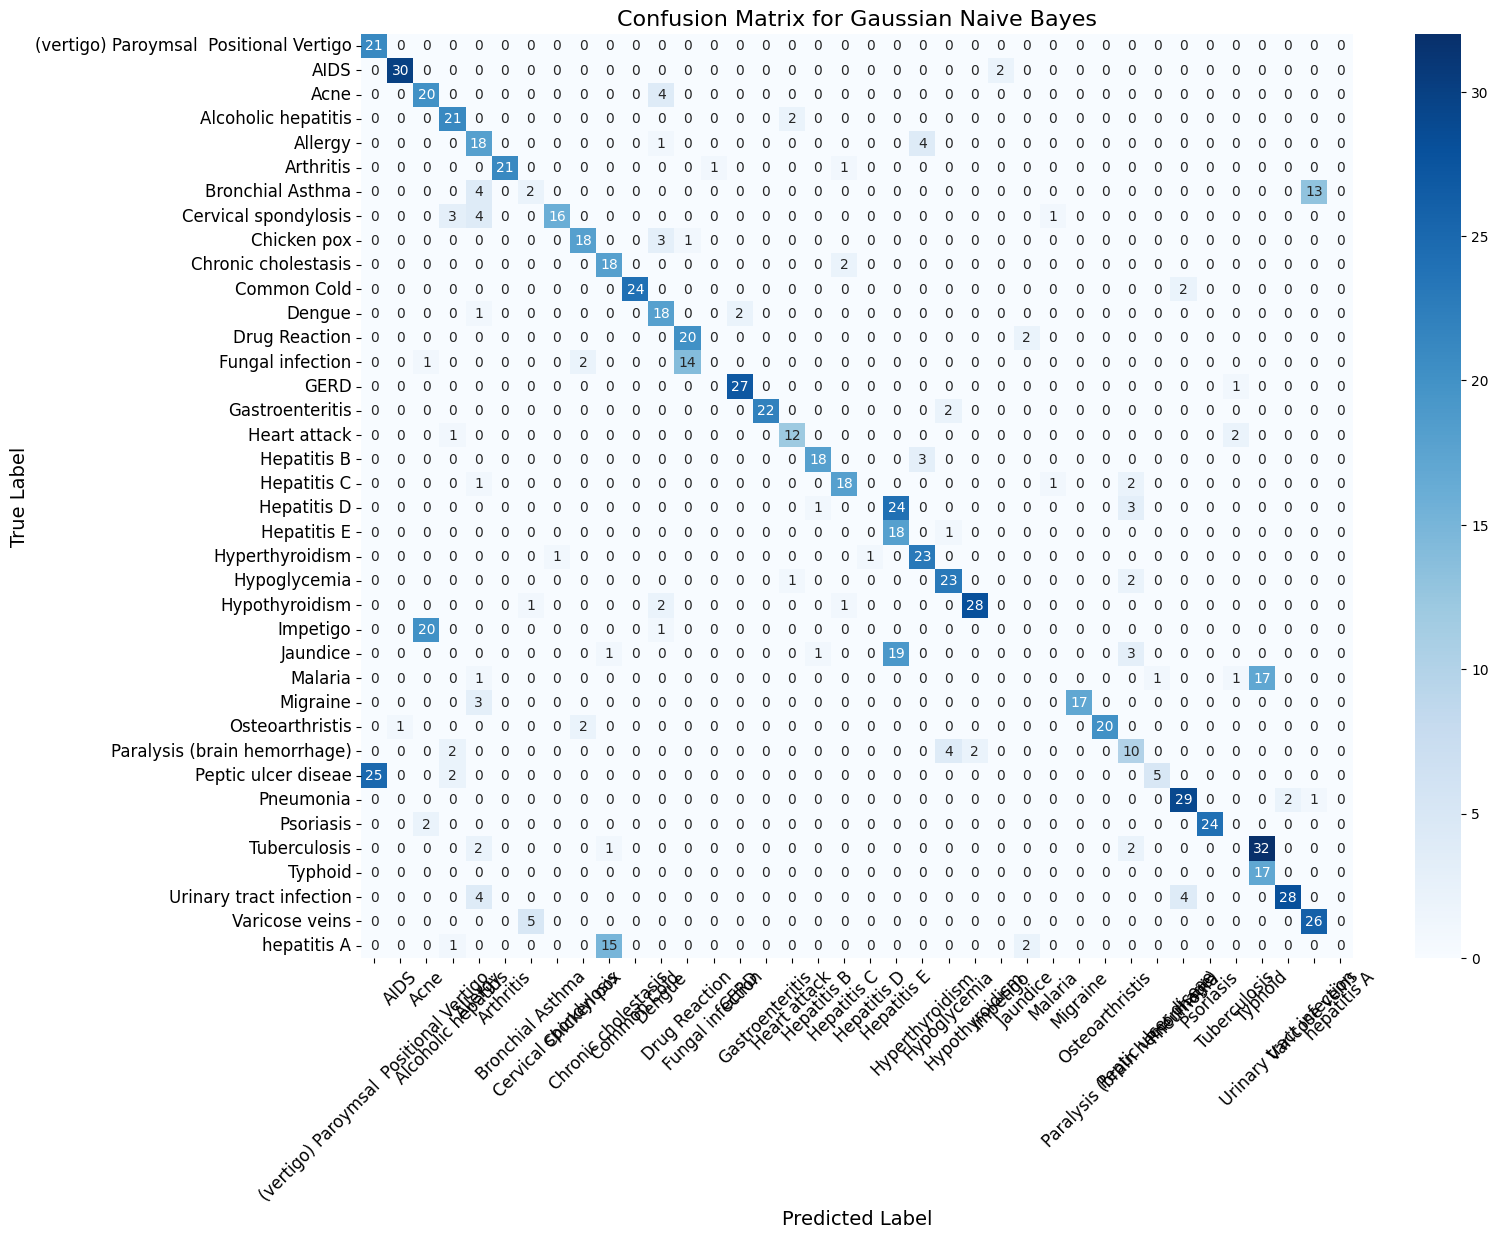

In [54]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, labels, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(16, 12))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted Label", fontsize=14)
    plt.ylabel("True Label", fontsize=14)
    plt.title(title, fontsize=16)
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(rotation=0, fontsize=12)
    plt.show()

labels = sorted(y.unique())

y_pred_rf = rf.predict(X_test)
plot_confusion_matrix(y_test, y_pred_rf, labels, "Confusion Matrix for Random Forest")

y_pred_gnb = gnb_model.predict(X_test)
plot_confusion_matrix(y_test, y_pred_gnb, labels, "Confusion Matrix for Gaussian Naive Bayes")


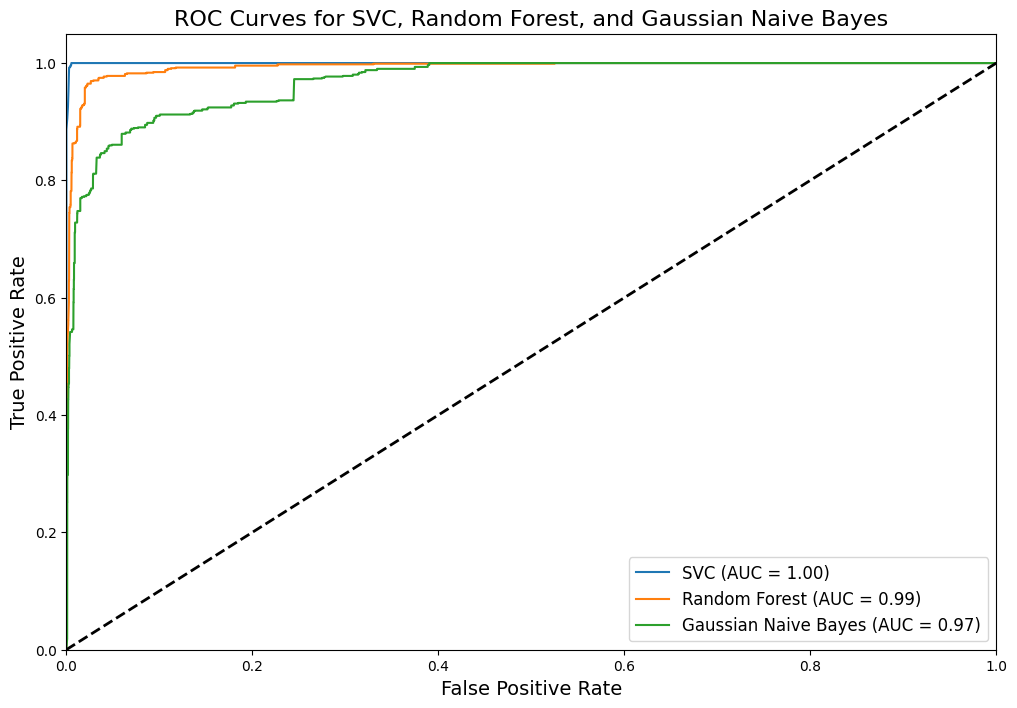

In [55]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# Binarize the output labels
y_test_binarized = label_binarize(y_test, classes=sorted(y.unique()))
n_classes = y_test_binarized.shape[1]

# Function to plot a single ROC curve for each model
def plot_roc_curves_single(models, model_names, X_test, y_test_binarized, n_classes):
    plt.figure(figsize=(12, 8))
    
    for model, name in zip(models, model_names):
        # Get the predicted probabilities
        if hasattr(model, "predict_proba"):
            y_score = model.predict_proba(X_test)
        elif hasattr(model, "decision_function"):
            y_score = model.decision_function(X_test)
        else:
            raise ValueError(f"Model {name} does not support predict_proba or decision_function.")

        # Compute micro-average ROC curve and AUC
        fpr, tpr, _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
        roc_auc = auc(fpr, tpr)

        # Plot the ROC curve
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=14)
    plt.ylabel('True Positive Rate', fontsize=14)
    plt.title('ROC Curves for SVC, Random Forest, and Gaussian Naive Bayes', fontsize=16)
    plt.legend(loc="lower right", fontsize=12)
    plt.show()

# Models to evaluate
models = [SVCM, rf, gnb_model]
model_names = ["SVC", "Random Forest", "Gaussian Naive Bayes"]

plot_roc_curves_single(models, model_names, X_test, y_test_binarized, n_classes)
